In [1]:
using Pkg
using Serialization
using DataFrames
using StatsPlots
Pkg.activate("..")
include("dynamics.jl")
include("planner.jl")
include("planner_utils.jl")
include("utils.jl")
include("plotting.jl")
include("mpc.jl")
include("sim.jl")
include("experiments.jl")
include("velocity_obstacles.jl")

  Activating project at `~/repos/ProactiveHRI.jl`


reactive_velocity_obstacles (generic function with 1 method)

In [2]:
proactiveHRI_robot_cooperative_human_circular = deserialize("../experimental_results/ProactiveHRI_robot_cooperative_human_circular.dat")
proactiveHRI_robot_cooperative_human_head_on = deserialize("../experimental_results/ProactiveHRI_robot_cooperative_human_head_on.dat")
SFM_robot_cooperative_human_circular = deserialize("../experimental_results/SFM_robot_cooperative_human_circular.dat")
SFM_robot_cooperative_human_head_on = deserialize("../experimental_results/SFM_robot_cooperative_human_head_on.dat")
HJ_robot_cooperative_human_circular = deserialize("../experimental_results/HJ_robot_cooperative_human_circular.dat")
HJ_robot_cooperative_human_head_on = deserialize("../experimental_results/HJ_robot_cooperative_human_head_on.dat")
OC_robot_cooperative_human_circular = deserialize("../experimental_results/OC_robot_cooperative_human_circular.dat")
OC_robot_cooperative_human_head_on = deserialize("../experimental_results/OC_robot_cooperative_human_head_on.dat")

proactiveHRI_robot_oc_human_head_on = deserialize("../experimental_results/ProactiveHRI_robot_oc_human_head_on.dat")
SFM_robot_oc_human_head_on = deserialize("../experimental_results/SFM_robot_oc_human_head_on.dat")
HJ_robot_oc_human_head_on = deserialize("../experimental_results/HJ_robot_oc_human_head_on.dat")
OC_robot_oc_human_head_on = deserialize("../experimental_results/oc_robot_oc_human_head_on.dat")




Dict{String, SimMetrics} with 199 entries:
  "Run 151" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 140" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 20"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 35"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 192" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 127" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 137" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 181" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 15"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 60"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 150" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 99"  => SimMetrics(SimData(IPSimParams(PlannerParams(Planne

In [42]:
b = ["Ours: Robot"]
for i in 1:198
    push!(b, "Ours: Robot")
end
for i in 1:199
    push!(b, "Ours: Human")
end
for i in 1:199
    push!(b, "SFM: Robot")
end
for i in 1:199
    push!(b, "SFM: Human")
end
for i in 1:199
    push!(b, "HJ: Robot")
end
for i in 1:199
    push!(b, "HJ: Human")
end
for i in 1:199
    push!(b, "OC: Robot")
end
for i in 1:199
    push!(b, "OC: Human")
end

In [43]:
PI_ibr_data = [[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199];[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]]

1592-element Vector{Float64}:
 4.7767637449015075
 4.8308511871466635
 4.794514128200691
 4.869988649962186
 4.801452949064725
 4.711696165879048
 4.80867179127615
 4.7379059174423785
 4.708300264264047
 4.830961352373747
 ⋮
 6.489013489114156
 6.25296943292288
 5.605341171690763
 5.989698242205687
 6.180143730089214
 6.106503322145329
 6.006430798419746
 6.18458081679608
 6.13422350234538

In [44]:
nothing_data = [[-90 for i in 1:20]; [-20 for i in 1:40]; [50 for i in 1:20]]
nothing_data_1_string = ["" for i in 1:80]
nothing_data_2_string = [" " for i in 1:80]
nothing_data_3_string = ["  " for i in 1:80]

80-element Vector{String}:
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 ⋮
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "

In [45]:
PHRI_robot_df = DataFrame(A=PI_ibr_data[1:199], B=b[1:199])
PHRI_human_df = DataFrame(A=PI_ibr_data[200:398], B=b[200:398])
SFM_robot_df = DataFrame(A=PI_ibr_data[399:597], B=b[399:597])
SFM_human_df = DataFrame(A=PI_ibr_data[598:796], B=b[598:796])
HJ_robot_df = DataFrame(A=PI_ibr_data[797:995], B=b[797:995])
HJ_human_df = DataFrame(A=PI_ibr_data[996:1194], B=b[996:1194])
OC_robot_df = DataFrame(A=PI_ibr_data[1195:1393], B=b[1195:1393])
OC_human_df = DataFrame(A=PI_ibr_data[1393:end], B=b[1393:end])

nothing_df_1 = DataFrame(A=nothing_data, B=nothing_data_1_string)
nothing_df_2 = DataFrame(A=nothing_data, B=nothing_data_2_string)
nothing_df_3 = DataFrame(A=nothing_data, B=nothing_data_3_string)



Row,A,B
,Int64,String
1,-90,
2,-90,
3,-90,
4,-90,
5,-90,
6,-90,
7,-90,
8,-90,
9,-90,


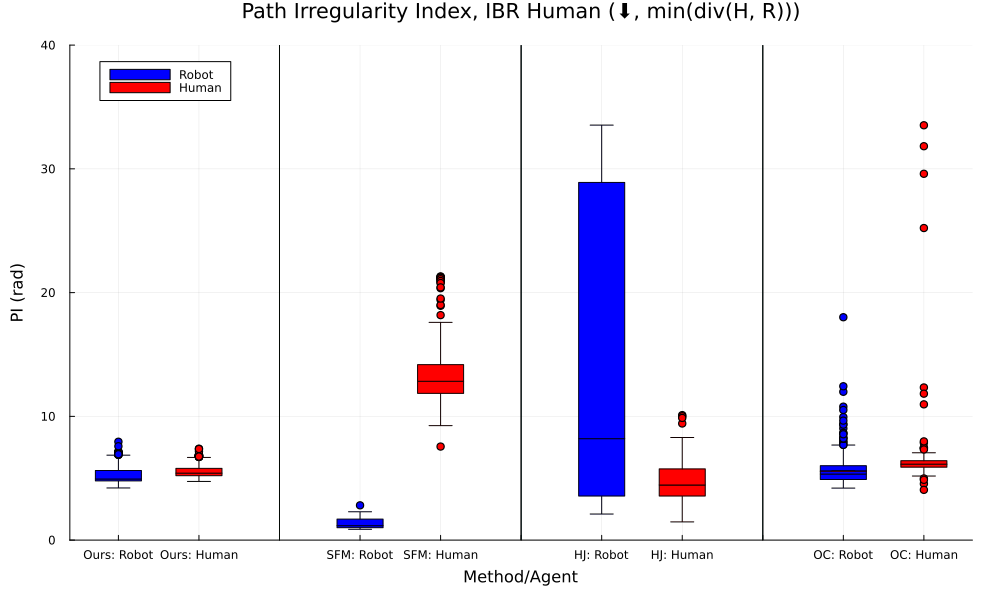

In [57]:
@df PHRI_robot_df boxplot(string.(:B), :A, size=(1000, 600), label="", title="Path Irregularity Index, IBR Human (⬇, min(div(H, R)))", xlabel="Method/Agent", ylabel="PI (rad)", margins=5mm, color=:blue, ylims=[0, 40], grid=true)
@df PHRI_human_df boxplot!(string.(:B), :A, color=:red, label="")
@df nothing_df_1 boxplot!(string.(:B), :A, label="")
@df SFM_robot_df boxplot!(string.(:B), :A, color=:blue, label="Robot")
@df SFM_human_df boxplot!(string.(:B), :A, color=:red, label="Human")
@df nothing_df_2 boxplot!(string.(:B), :A, label="")
@df HJ_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
@df HJ_human_df boxplot!(string.(:B), :A, color=:red, label="")
@df nothing_df_3 boxplot!(string.(:B), :A, label="")
@df OC_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
@df OC_human_df boxplot!(string.(:B), :A, color=:red, label="")
# @df PHRI_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df PHRI_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
# @df SFM_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df SFM_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
# @df HJ_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df HJ_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
# @df OC_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df OC_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)

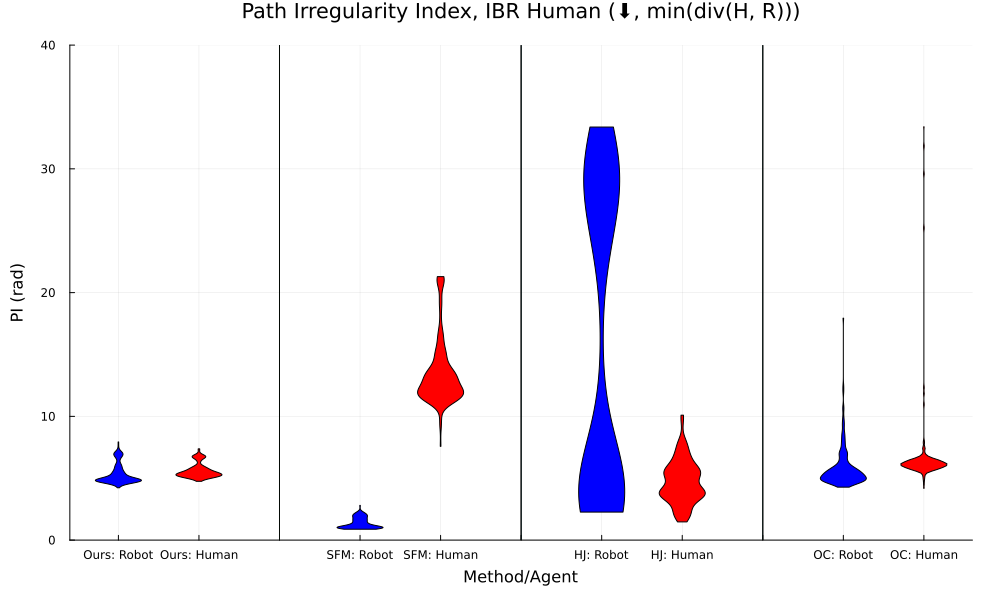

In [58]:
@df PHRI_robot_df violin(string.(:B), :A, size=(1000, 600), label="", title="Path Irregularity Index, IBR Human (⬇, min(div(H, R)))", xlabel="Method/Agent", ylabel="PI (rad)", margins=5mm, color=:blue, ylims=[0, 40])
# @df PHRI_human_df boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_1 boxplot!(string.(:B), :A, label="", color=)
# @df SFM_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
# @df SFM_human_df boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_2 boxplot!(string.(:B), :A, label="")
# @df HJ_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
# @df HJ_human_df boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_3 boxplot!(string.(:B), :A, label="")
# @df OC_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
# @df OC_human_df boxplot!(string.(:B), :A, color=:red, label="")
# @df PHRI_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df PHRI_human_df violin!(string.(:B), :A, color=:red, label="")
@df nothing_df_1 boxplot!(string.(:B), :A, label="")
@df SFM_robot_df violin!(string.(:B), :A, color=:blue, label="")
@df SFM_human_df violin!(string.(:B), :A, color=:red, label="")
@df nothing_df_2 boxplot!(string.(:B), :A, label="")
@df HJ_robot_df violin!(string.(:B), :A, color=:blue, label="")
@df HJ_human_df violin!(string.(:B), :A, color=:red, label="")
@df nothing_df_3 boxplot!(string.(:B), :A, label="")
@df OC_robot_df violin!(string.(:B), :A, color=:blue, label="")
@df OC_human_df violin!(string.(:B), :A, color=:red, label="")

In [49]:
PI_oc_data = [[proactiveHRI_robot_oc_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199];[proactiveHRI_robot_oc_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [SFM_robot_oc_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [SFM_robot_oc_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [HJ_robot_oc_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [HJ_robot_oc_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [OC_robot_oc_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [OC_robot_oc_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]]

1592-element Vector{Float64}:
 4.603281533612452
 6.034725854316564
 4.8551405902294915
 6.186742849442524
 6.106326511542004
 6.155830905078191
 4.709679106473374
 6.225618666574269
 6.140228788307319
 6.13952301729431
 ⋮
 6.467777331038515
 6.893565787968437
 8.171391931816554
 6.366008809640642
 5.972079926524509
 6.221990465455149
 6.4658641976913
 6.442364173925447
 5.619705776925547

In [50]:
PHRI_robot_df_oc = DataFrame(A=PI_oc_data[1:199], B=b[1:199])
PHRI_human_df_oc = DataFrame(A=PI_oc_data[200:398], B=b[200:398])
SFM_robot_df_oc = DataFrame(A=PI_oc_data[399:597], B=b[399:597])
SFM_human_df_oc = DataFrame(A=PI_oc_data[598:796], B=b[598:796])
HJ_robot_df_oc = DataFrame(A=PI_oc_data[797:995], B=b[797:995])
HJ_human_df_oc = DataFrame(A=PI_oc_data[996:1194], B=b[996:1194])
OC_robot_df_oc = DataFrame(A=PI_oc_data[1195:1393], B=b[1195:1393])
OC_human_df_oc = DataFrame(A=PI_oc_data[1393:end], B=b[1393:end])

Row,A,B
,Float64,String
1,5.80836,OC: Robot
2,6.81516,OC: Human
3,6.65472,OC: Human
4,9.20711,OC: Human
5,6.29739,OC: Human
6,5.59416,OC: Human
7,6.78738,OC: Human
8,9.61482,OC: Human
9,6.35021,OC: Human


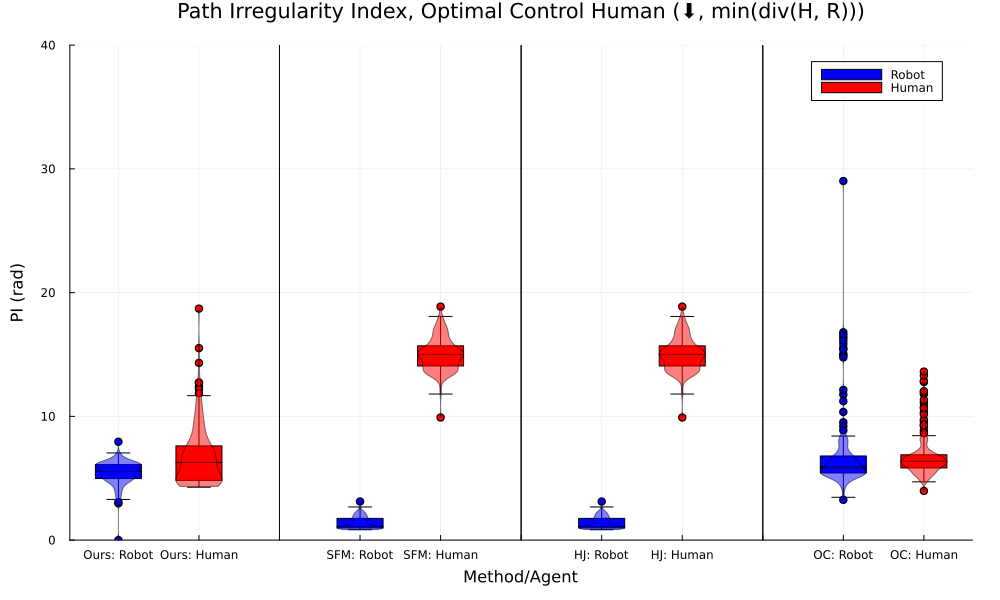

In [56]:
@df PHRI_robot_df_oc boxplot(string.(:B), :A, size=(1000, 600), label="", title="Path Irregularity Index, Optimal Control Human (⬇, min(div(H, R)))", xlabel="Method/Agent", ylabel="PI (rad)", margins=5mm, color=:blue, ylims=[0, 40], grid=true)
@df PHRI_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
@df nothing_df_1 boxplot!(string.(:B), :A, label="")
@df SFM_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="Robot")
@df SFM_human_df_oc boxplot!(string.(:B), :A, color=:red, label="Human")
@df nothing_df_2 boxplot!(string.(:B), :A, label="")
@df HJ_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="")
@df HJ_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
@df nothing_df_3 boxplot!(string.(:B), :A, label="")
@df OC_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="")
@df OC_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
@df PHRI_robot_df_oc violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df PHRI_human_df_oc violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
@df SFM_robot_df_oc violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df SFM_human_df_oc violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
@df HJ_robot_df_oc violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df HJ_human_df_oc violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
@df OC_robot_df_oc violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df OC_human_df_oc violin!(string.(:B), :A, color=:red, label="", alpha=0.5)

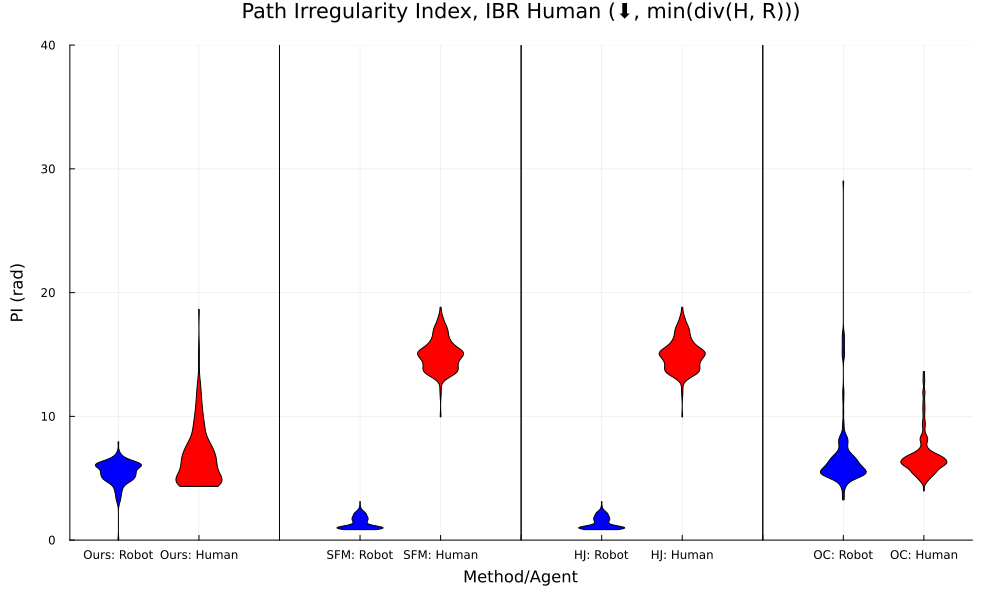

In [55]:
@df PHRI_robot_df_oc violin(string.(:B), :A, size=(1000, 600), label="", title="Path Irregularity Index, IBR Human (⬇, min(div(H, R)))", xlabel="Method/Agent", ylabel="PI (rad)", margins=5mm, color=:blue, ylims=[0, 40])
# @df PHRI_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_1 boxplot!(string.(:B), :A, label="", color=)
# @df SFM_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="")
# @df SFM_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_2 boxplot!(string.(:B), :A, label="")
# @df HJ_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="")
# @df HJ_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_3 boxplot!(string.(:B), :A, label="")
# @df OC_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="")
# @df OC_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
# @df PHRI_robot_df_oc violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df PHRI_human_df_oc violin!(string.(:B), :A, color=:red, label="")
@df nothing_df_1 boxplot!(string.(:B), :A, label="")
@df SFM_robot_df_oc violin!(string.(:B), :A, color=:blue, label="")
@df SFM_human_df_oc violin!(string.(:B), :A, color=:red, label="")
@df nothing_df_2 boxplot!(string.(:B), :A, label="")
@df HJ_robot_df_oc violin!(string.(:B), :A, color=:blue, label="")
@df HJ_human_df_oc violin!(string.(:B), :A, color=:red, label="")
@df nothing_df_3 boxplot!(string.(:B), :A, label="")
@df OC_robot_df_oc violin!(string.(:B), :A, color=:blue, label="")
@df OC_human_df_oc violin!(string.(:B), :A, color=:red, label="")

# Task Completion Plot

In [13]:
d2g_data = [[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199];[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]]

1592-element Vector{Float64}:
 3.400927429298111
 3.3606486271379428
 3.3728505436450096
 3.3927779744319286
 3.382382229406647
 3.3789584582778125
 3.35679259307837
 3.3648699848281733
 3.371694437901947
 3.3357434996072772
 ⋮
 3.3649306354028234
 3.360623313570176
 3.355429817888915
 3.41004231395402
 3.3685470161223483
 3.3563225937267607
 3.373949168537696
 3.3648423329472634
 3.3673047813234196

In [18]:
PHRI_robot_df_d2g = DataFrame(A=d2g_data[1:199], B=b[1:199])
PHRI_human_df_d2g = DataFrame(A=d2g_data[200:398], B=b[200:398])
SFM_robot_df_d2g = DataFrame(A=d2g_data[399:597], B=b[399:597])
SFM_human_df_d2g = DataFrame(A=d2g_data[598:796], B=b[598:796])
HJ_robot_df_d2g = DataFrame(A=d2g_data[797:995], B=b[797:995])
HJ_human_df_d2g = DataFrame(A=d2g_data[996:1194], B=b[996:1194])
OC_robot_df_d2g = DataFrame(A=d2g_data[1195:1393], B=b[1195:1393])
OC_human_df_d2g = DataFrame(A=d2g_data[1393:end], B=b[1393:end])

Row,A,B
,Float64,String
1,3.31792,OC: Robot
2,3.35917,OC: Human
3,3.36682,OC: Human
4,3.35086,OC: Human
5,3.39361,OC: Human
6,3.37428,OC: Human
7,3.35835,OC: Human
8,3.37037,OC: Human
9,3.39445,OC: Human


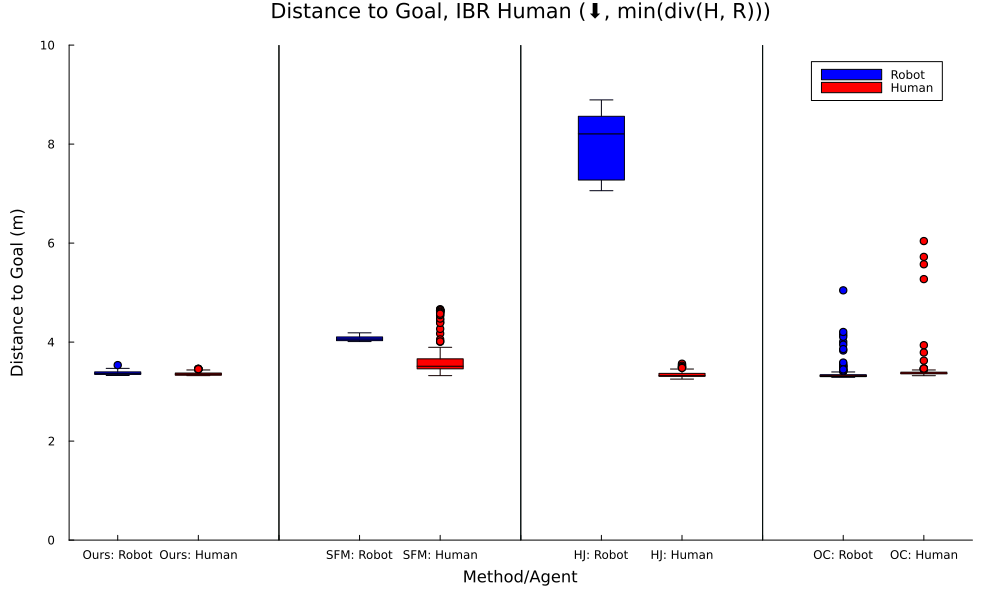

In [54]:
@df PHRI_robot_df_d2g boxplot(string.(:B), :A, size=(1000, 600), label="", title="Distance to Goal, IBR Human (⬇, min(div(H, R)))", xlabel="Method/Agent", ylabel="Distance to Goal (m)", margins=5mm, color=:blue, ylims=[0, 10], grid=false)
@df PHRI_human_df_d2g boxplot!(string.(:B), :A, color=:red, label="")
@df nothing_df_1 boxplot!(string.(:B), :A, label="")
@df SFM_robot_df_d2g boxplot!(string.(:B), :A, color=:blue, label="Robot")
@df SFM_human_df_d2g boxplot!(string.(:B), :A, color=:red, label="Human")
@df nothing_df_2 boxplot!(string.(:B), :A, label="")
@df HJ_robot_df_d2g boxplot!(string.(:B), :A, color=:blue, label="")
@df HJ_human_df_d2g boxplot!(string.(:B), :A, color=:red, label="")
@df nothing_df_3 boxplot!(string.(:B), :A, label="")
@df OC_robot_df_d2g boxplot!(string.(:B), :A, color=:blue, label="")
@df OC_human_df_d2g boxplot!(string.(:B), :A, color=:red, label="")
# @df PHRI_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df PHRI_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
# @df SFM_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df SFM_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
# @df HJ_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df HJ_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
# @df OC_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df OC_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)

# Minimum Distance Plots

In [61]:
min_dist_ibr_data = [[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]]

796-element Vector{Float64}:
 0.9951638503779257
 0.9952928215018145
 0.9936792413986136
 0.9950134487440799
 0.9945527443110178
 0.9953956486393135
 0.994782475815532
 0.9953850098181362
 0.9955589072822186
 0.9954013968887565
 ⋮
 0.9986055031410177
 0.9985363712554051
 0.9984506613291102
 0.9983451167761747
 0.9966406866830594
 0.9981358399162042
 0.9982148265856675
 0.9985992621675642
 1.0219575570942083

In [60]:
c = ["Ours"]
for i in 1:198
    push!(c, "Ours")
end
for i in 1:199
    push!(c, "SFM")
end
for i in 1:199
    push!(c, "HJ")
end
for i in 1:199
    push!(c, "OC")
end

In [68]:
PHRI_oc_df_min_dist= DataFrame(A=min_dist_ibr_data[1:199], B=c[1:199])
SFM_oc_df_min_dist= DataFrame(A=min_dist_ibr_data[200:398], B=c[200:398])
HJ_oc_df_min_dist= DataFrame(A=min_dist_ibr_data[399:597], B=c[399:597])
OC_oc_df_min_dist= DataFrame(A=min_dist_ibr_data[598:796], B=c[598:796])

Row,A,B
,Float64,String
1,1.02371,OC
2,0.998464,OC
3,0.998606,OC
4,0.998563,OC
5,0.998567,OC
6,0.998589,OC
7,0.998161,OC
8,0.99869,OC
9,1.06981,OC


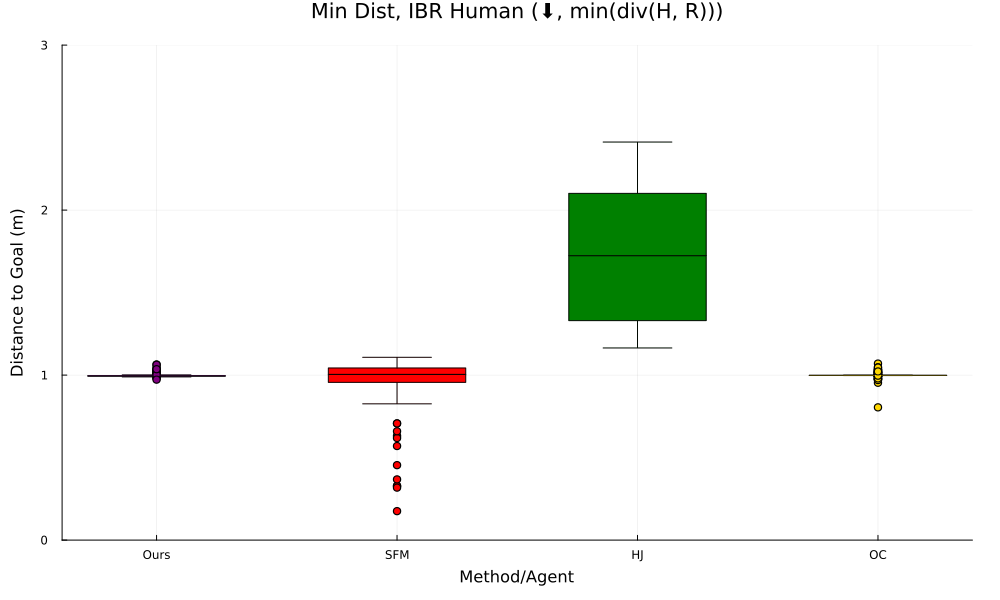

In [73]:
@df PHRI_oc_df_min_dist boxplot(string.(:B), :A, size=(1000, 600), label="", title="Min Dist, IBR Human (⬇, min(div(H, R)))", xlabel="Method/Agent", ylabel="Distance to Goal (m)", margins=5mm, ylims=[0, 3], grid=true, color=:purple)
@df SFM_oc_df_min_dist boxplot!(string.(:B), :A, label="", color=:red)
@df HJ_oc_df_min_dist boxplot!(string.(:B), :A, label="", color=:green)
@df OC_oc_df_min_dist boxplot!(string.(:B), :A, label="", color=:gold)
